In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
import plotly.express as px

# Load the data
url=('Data_Mahasiswa.csv')
data = pd.read_csv(url, sep=';')

# Tampilkan beberapa bar1is pertama
print(data.head())

# Cek dimensi data
print(data.shape)


  Email Address         Nama Lengkap Mahasiswa      NIM   \
0           NaN                            NaN       NaN   
1           NaN  Samuel Saut Royzeki Aritonang  11422026   
2           NaN            Calvin Josep Silaen  11422038   
3           NaN                Indah Silitonga  11422060   
4           NaN             Asri Yohana Sirait  11422029   

                             Program Studi Mahasiswa Angkatan Mahasiswa  \
0                                                NaN                NaN   
1  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
2  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
3  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
4  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   

  Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?    \
0                                                NaN                       
1                                   

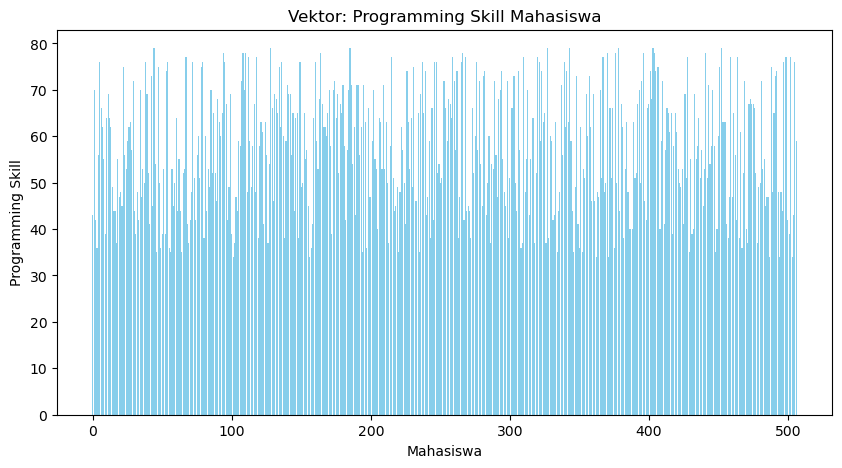

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = "Data_Mahasiswa.csv" 

if 'df' in locals():
    df_numeric = df[['Programming Skill']].copy()
    df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')  

    # Membuat visualisasi vektor untuk "Programming Skill"
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(df_numeric)), df_numeric['Programming Skill'], color='skyblue')
    plt.xlabel("Mahasiswa")
    plt.ylabel("Programming Skill")
    plt.title("Vektor: Programming Skill Mahasiswa")
    plt.show()

    # Memilih kolom yang relevan untuk matriks korelasi
    kolom_matriks = [
        "Programming Skill",
        "Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?  ",
        "Berapa rata-rata nilai Matematika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ",
        "Berapa rata-rata nilai Fisika Anda pada Ujian Sekolah (nilai Ijazah) di SMA? ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)",
        "Berapa rata-rata nilai Biologi Anda pada Ujian Sekolah (nilai Ijazah)  di SMA?  ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)",
        "Berapa rata-rata nilai Kimia Anda pada Ujian Sekolah (nilai Ijazah)  di SMA?  ( jika sebelumnya berasal dari IPS atau SMK bisa memilih range D)"
    ]


    kolom_tersedia = [col for col in kolom_matriks if col in df.columns]

    df_matriks = df[kolom_tersedia].apply(pd.to_numeric, errors='coerce')
    corr_matrix = df_matriks.corr()


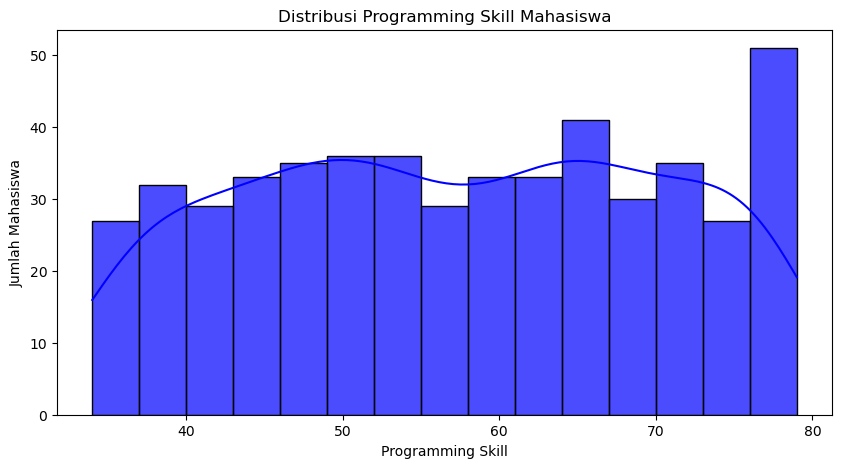

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Programming Skill"], bins=15, kde=True, color="blue", alpha=0.7)
plt.xlabel("Programming Skill")
plt.ylabel("Jumlah Mahasiswa")
plt.title("Distribusi Programming Skill Mahasiswa")
plt.show()


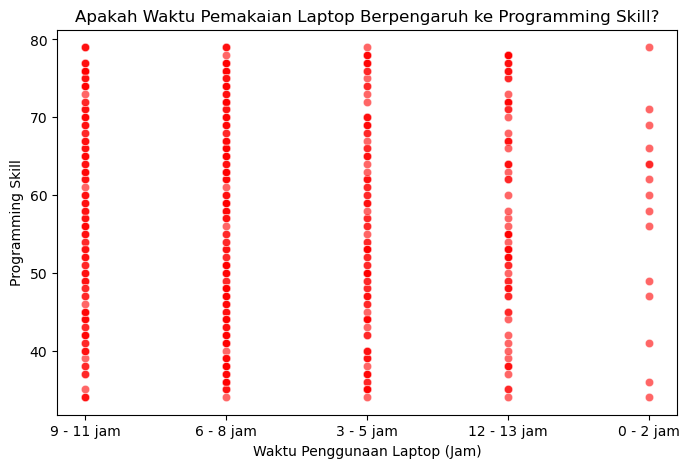

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?  "], 
                y=df["Programming Skill"], 
                color="red", alpha=0.6)
plt.xlabel("Waktu Penggunaan Laptop (Jam)")
plt.ylabel("Programming Skill")
plt.title("Apakah Waktu Pemakaian Laptop Berpengaruh ke Programming Skill?")
plt.show()


In [16]:
df_numeric = df[["Programming Skill", 
                 "Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?  ", 
                 "Nilai Akademik"]]

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi: Apa yang Mempengaruhi Nilai Akademik?")
plt.show()


KeyError: "['Nilai Akademik'] not in index"

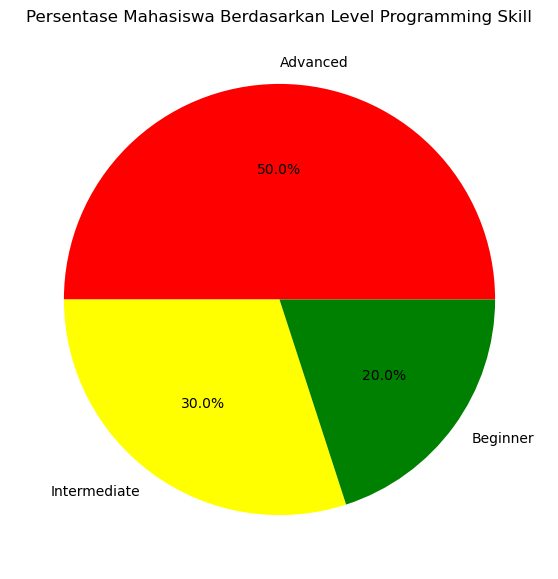

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Programming Skill": [85, 40, 60, 90, 75, 50, 30, 95, 80, 45],
    "Waktu Penggunaan Laptop": [5, 2, 3, 7, 6, 3, 1, 8, 6, 2],
    "Nilai Akademik": [90, 50, 70, 95, 85, 55, 40, 98, 88, 45]
}

df = pd.DataFrame(data)
matrix_data = df.to_numpy()  

# Mengekstrak satu vektor dari matriks
skill_vector = matrix_data[:, 0]  
bins = [0, 40, 70, 100]  
labels = ["Beginner", "Intermediate", "Advanced"]
df["Skill Level"] = pd.cut(skill_vector, bins=bins, labels=labels)


plt.figure(figsize=(7, 7))
df["Skill Level"].value_counts().plot.pie(autopct="%1.1f%%", colors=["red", "yellow", "green"])
plt.title("Persentase Mahasiswa Berdasarkan Level Programming Skill")
plt.ylabel("")
plt.show()

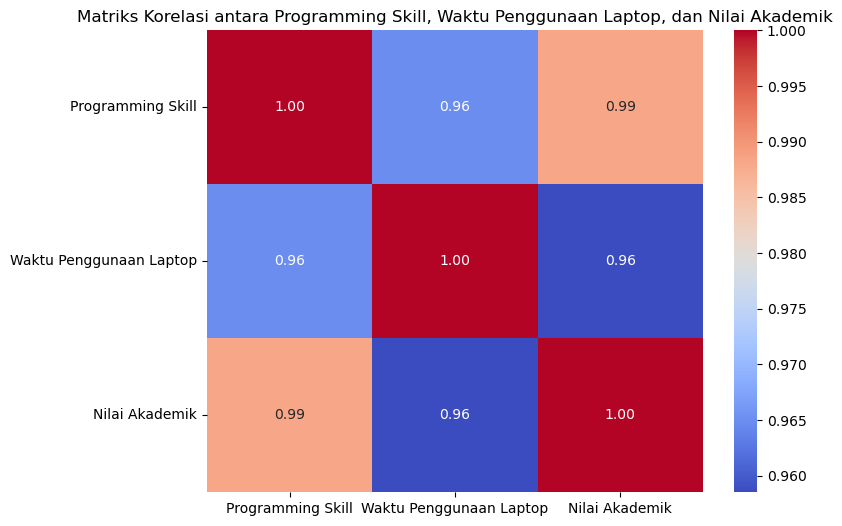

In [38]:
corr_matrix = df.drop(columns=["Skill Level"]).corr()  # Hitung korelasi antar fitur

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antara Programming Skill, Waktu Penggunaan Laptop, dan Nilai Akademik")
plt.show()
